# IMDb Movie Duration Analysis

## Problem Statement
This project investigates whether movie characteristics such as release year and age certification influence movie duration.

Key questions:
- Do movies get longer over time?
- Do mature-rated movies tend to be longer?

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('data.csv')
df.head()

,Rank,Title,Year,Rating,Duration_Minutes,Certificate,Source
0,1,The Shawshank Redemption,1994,NaN,142,R,IMDb Top 250
1,2,The Godfather,1972,NaN,175,R,IMDb Top 250
2,3,The Dark Knight,2008,NaN,152,PG-13,IMDb Top 250
3,4,The Godfather Part II,1974,NaN,202,R,IMDb Top 250
4,5,12 Angry Men,1957,NaN,96,Approved,IMDb Top 250


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              250 non-null    int64  
 1   Title             250 non-null    object 
 2   Year              250 non-null    int64  
 3   Rating            0 non-null      float64
 4   Duration_Minutes  250 non-null    int64  
 5   Certificate       245 non-null    object 
 6   Source            250 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 13.8+ KB


In [38]:
df.describe(include='all')

,Rank,Title,Year,Rating,Duration_Minutes,Certificate,Source
count,250.000000,250,250.000000,0.0,250.000000,245,250
unique,NaN,250,NaN,NaN,NaN,8,1
top,NaN,The Shawshank Redemption,NaN,NaN,NaN,R,IMDb Top 250
freq,NaN,1,NaN,NaN,NaN,103,250
mean,125.500000,NaN,1988.620000,NaN,131.516000,NaN,NaN
std,72.312977,NaN,25.552442,NaN,35.747128,NaN,NaN
min,1.000000,NaN,1921.000000,NaN,45.000000,NaN,NaN
25%,63.250000,NaN,1973.000000,NaN,108.250000,NaN,NaN
50%,125.500000,NaN,1995.000000,NaN,127.500000,NaN,NaN
75%,187.750000,NaN,2009.000000,NaN,147.750000,NaN,NaN


### Data cleaning

In [39]:
df.drop('Rank', axis=1, inplace=True)
df.drop('Source', axis=1, inplace=True)
df.drop('Rating', axis=1, inplace=True)

## Plot

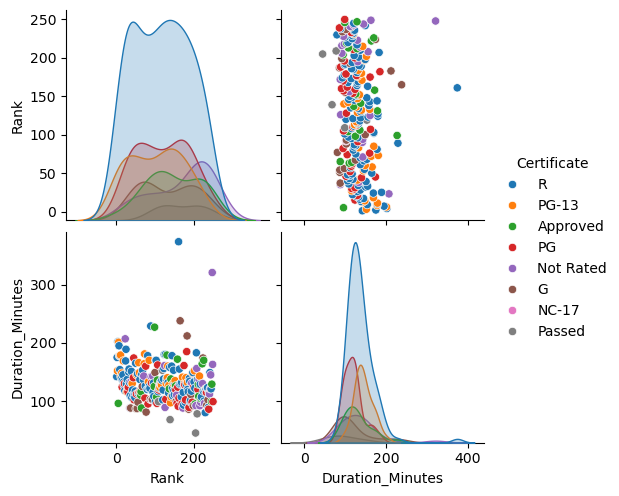

In [110]:
sns.pairplot(df, hue='Certificate')
plt.show()

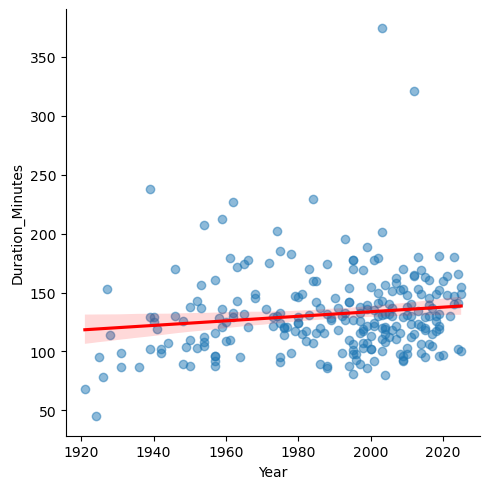

In [81]:
sns.lmplot(x = 'Year', y = 'Duration_Minutes', data = df, scatter_kws = {'alpha':0.5,}, line_kws={'color': 'red'})

### Dealing with outliers

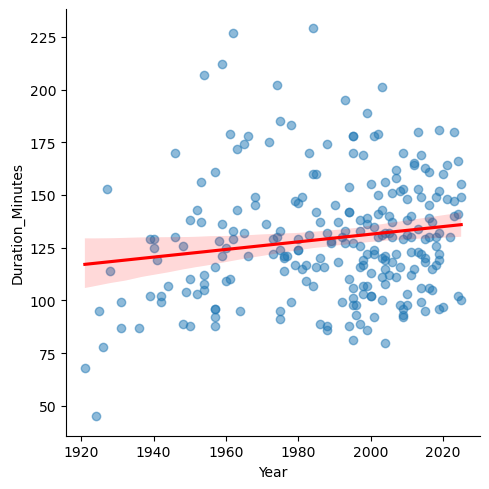

In [66]:
q = df['Duration_Minutes'].quantile(0.99)
data1 = df[df['Duration_Minutes']<q]
data1.describe()
data_cleaned = data1.reset_index(drop=True)
sns.lmplot(x = 'Year', y = 'Duration_Minutes', data = data_cleaned, scatter_kws = {'alpha':0.5,}, line_kws={'color': 'red'})

### Linear Regression
We test whether release year can predict movie duration using a simple linear regression model.

In [82]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [83]:
X = data_cleaned[['Year']]
Y = data_cleaned['Duration_Minutes']

In [84]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(x_train)
print(y_train)

     Year
154  2003
211  1953
118  1927
195  2014
240  1966
..    ...
106  2007
14   1980
92   2010
179  1975
102  1983

[197 rows x 1 columns]
154    100
211    137
118    153
195    149
240    121
      ... 
106    162
14     124
92     103
179    185
102    170
Name: Duration_Minutes, Length: 197, dtype: int64


In [85]:
lm = LinearRegression()
lm.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [86]:
print("Intercept:", lm.intercept_)
print("Coef:", lm.coef_[0])

Intercept: -222.8053015324953
Coef: 0.17704154075679474


In [87]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lm.predict(x_test)

print(f'R2: {r2_score(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R2: 0.040228687862875145
RMSE: 25.216181085819034


**The low R² suggests that release year explains very little of the variance in movie duration, indicating a weak relationship between these variables.**

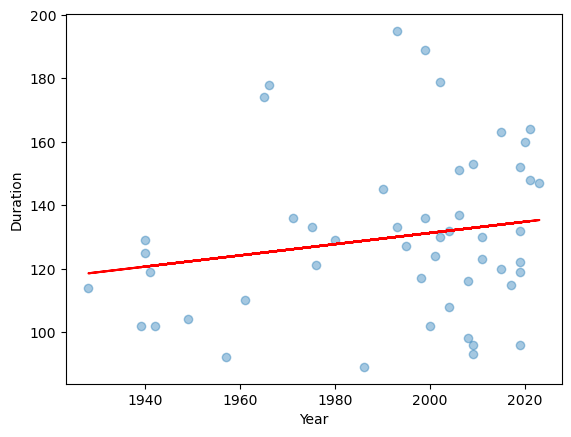

In [78]:
plt.scatter(x_test, y_test, alpha=0.4)
plt.plot(x_test, y_pred, color=a'red')
plt.xlabel('Year')
plt.ylabel('Duration')
plt.show()

## Do mature-rated movies tend to be longer?

In [101]:
df = pd.read_csv('Data.csv')
df.drop('Source', axis=1, inplace=True)
df.drop('Rating', axis=1, inplace=True)
df.drop('Year', axis=1, inplace=True)
df_cert = df.dropna(subset=['Certificate'])
df_cert.head()

,Rank,Title,Duration_Minutes,Certificate
0,1,The Shawshank Redemption,142,R
1,2,The Godfather,175,R
2,3,The Dark Knight,152,PG-13
3,4,The Godfather Part II,202,R
4,5,12 Angry Men,96,Approved


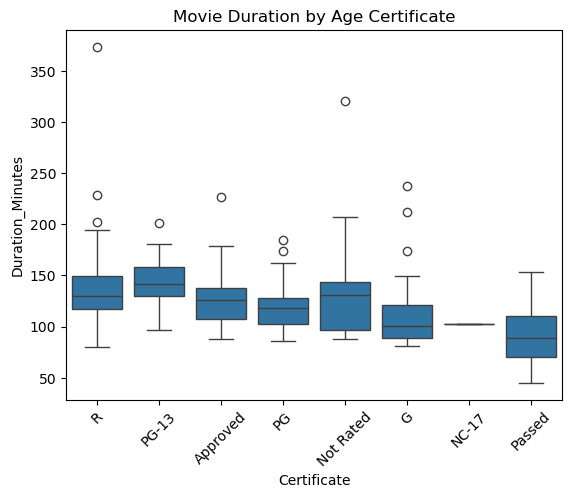

In [103]:
sns.boxplot(x='Certificate',y='Duration_Minutes', data=df_cert)
plt.title('Movie Duration by Age Certificate')
plt.xticks(rotation=45)
plt.show()

In [104]:
df_cert.groupby('Certificate')['Duration_Minutes'].agg(['mean','median','count'])

,mean,median,count
Certificate,,,
Approved,130.363636,125.5,22
G,118.277778,101.0,18
NC-17,102.000000,102.0,1
Not Rated,134.695652,131.0,23
PG,119.473684,118.0,38
PG-13,144.294118,141.5,34
Passed,92.833333,88.5,6
R,136.320388,130.0,103


## Hypothesis Testing
We compare the average runtime of mature vs non-mature movies using an independent t-test.

In [105]:
mature_labels = ['R', 'TV-MA', 'NC-17']
df_cert['Mature'] = df_cert['Certificate'].isin(mature_labels)
df_cert.groupby('Mature')['Duration_Minutes'].mean()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_13024\968039777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cert['Mature'] = df_cert['Certificate'].isin(mature_labels)


Mature
False    128.354610
True     135.990385
Name: Duration_Minutes, dtype: float64

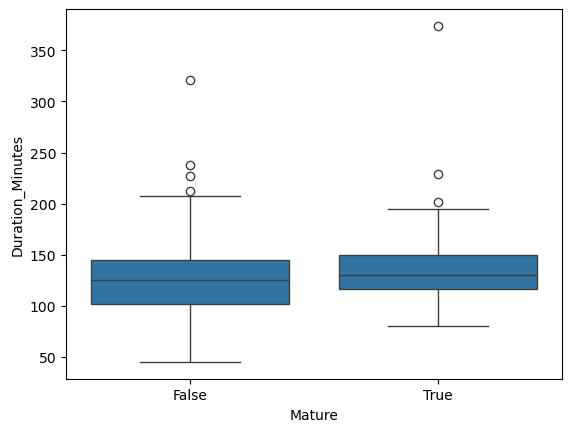

In [106]:
sns.boxplot(
    x='Mature',
    y='Duration_Minutes',
    data=df_cert
)
plt.show()

In [107]:
from scipy.stats import ttest_ind

mature = df_cert[df_cert['Mature']==True]['Duration_Minutes']
family = df_cert[df_cert['Mature']==False]['Duration_Minutes']

ttest_ind(mature, family)

TtestResult(statistic=np.float64(1.6484271356679203), pvalue=np.float64(0.10055731407156476), df=np.float64(243.0))

**While we might expect mature movies to be longer due to more complex narratives, the data does not provide strong statistical evidence to support this assumption.**

## Conclusion



Year alone **is not** a strong predictor of movie duration dues to low R².
Additionally, mature-rated movies **do not** show statistically significant longer runtimes (p = 0.10).
This suggests that runtime is influenced by other factors not present in the dataset.